In [9]:
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# Define your image transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize all images to same size
    transforms.ToTensor(),          # Convert to Tensor
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])  # Optional normalization
])

# Load datasets with updated paths
train_dataset = datasets.ImageFolder(root="/home/bay/codes/unet/xray/train", transform=transform)
val_dataset = datasets.ImageFolder(root="/home/bay/codes/unet/xray/val", transform=transform)
test_dataset = datasets.ImageFolder(root="/home/bay/codes/unet/xray/test", transform=transform)

# Loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Check class mappings
print(train_dataset.classes)       # Example: ['NORMAL', 'PNEUMONIA']
print(train_dataset.class_to_idx)  # Example: {'NORMAL': 0, 'PNEUMONIA': 1}


['NORMAL', 'PNEUMONIA']
{'NORMAL': 0, 'PNEUMONIA': 1}


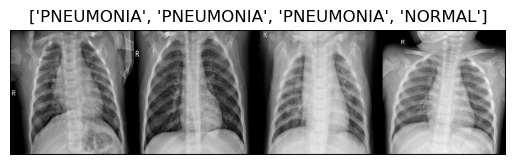

In [10]:
# Grab a batch
images, labels = next(iter(train_loader))

# Show a few images
grid_img = torchvision.utils.make_grid(images[:4], nrow=4)
plt.imshow(grid_img.permute(1, 2, 0))
plt.title([train_dataset.classes[i] for i in labels[:4]])
plt.axis('off')
plt.show()